# Rain Prediction in Australia

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\sarth\Downloads\Weather_Data.csv")
df

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,6/21/2017,8.6,19.6,0.0,2.0,7.8,SSE,37,W,SSE,...,73,52,1025.9,1025.3,2,2,10.5,17.9,No,No
3267,6/22/2017,9.3,19.2,0.0,2.0,9.2,W,30,W,ESE,...,78,53,1028.5,1024.6,2,2,11.0,18.7,No,No
3268,6/23/2017,9.4,17.7,0.0,2.4,2.7,W,24,WNW,N,...,85,56,1020.8,1015.0,6,6,10.2,17.3,No,No
3269,6/24/2017,10.1,19.3,0.0,1.4,9.3,W,43,W,W,...,56,35,1017.3,1015.1,5,2,12.4,19.0,No,No


In [3]:
df.shape

(3271, 22)

In [4]:
df.isnull().sum()

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,14.877102,23.005564,3.342158,5.175787,7.168970,41.476307,15.077041,19.294405,68.243962,54.698563,1018.334424,1016.003085,4.318557,4.176093,17.821461,21.543656
std,4.554710,4.483752,9.917746,2.757684,3.815966,10.806951,7.043825,7.453331,15.086127,16.279241,7.020090,7.019915,2.526923,2.411274,4.894316,4.297053
min,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.250000,35.000000,11.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.800000,26.000000,1.400000,7.000000,10.200000,44.000000,20.000000,24.000000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

In [7]:
df.nunique()

Date             3271
MinTemp           204
MaxTemp           247
Rainfall          208
Evaporation        82
Sunshine          137
WindGustDir        16
WindGustSpeed      44
WindDir9am         16
WindDir3pm         16
WindSpeed9am       26
WindSpeed3pm       29
Humidity9am        80
Humidity3pm        86
Pressure9am       361
Pressure3pm       369
Cloud9am           10
Cloud3pm            9
Temp9am           229
Temp3pm           240
RainToday           2
RainTomorrow        2
dtype: int64

In [8]:
df.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### Calculating Features Dtypes 

In [9]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print(f"Numerical Features Count {len(numerical_features)}")
print(f"Discrete feature Count {len(discrete_features)}")
print(f"Continuous feature Count {len(continuous_features)}")
print(f"Categorical feature Count {len(categorical_features)}")

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 6


In [10]:
print(categorical_features)

['Date', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [11]:
df = df.drop(['Date'],axis= 1)

### Analysing Continuous Features through DistPlot

C:\Users\sarth\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


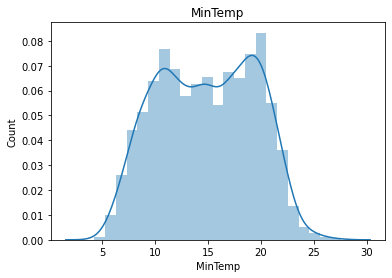

<Figure size 1080x1080 with 0 Axes>

C:\Users\sarth\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


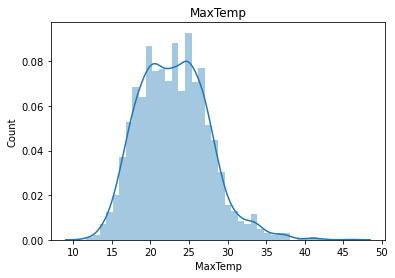

<Figure size 1080x1080 with 0 Axes>

C:\Users\sarth\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


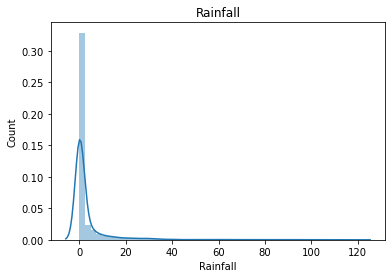

<Figure size 1080x1080 with 0 Axes>

C:\Users\sarth\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


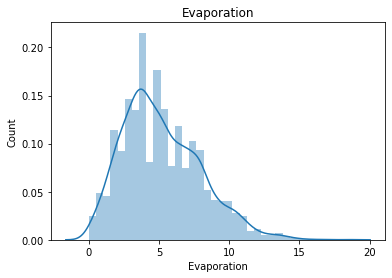

<Figure size 1080x1080 with 0 Axes>

C:\Users\sarth\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


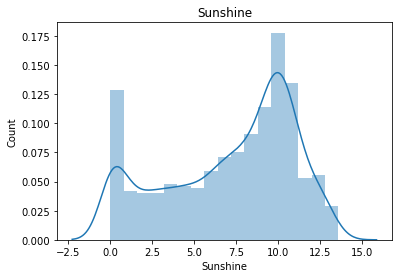

<Figure size 1080x1080 with 0 Axes>

C:\Users\sarth\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


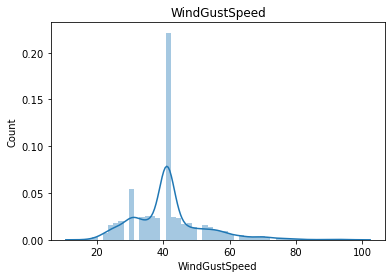

<Figure size 1080x1080 with 0 Axes>

C:\Users\sarth\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


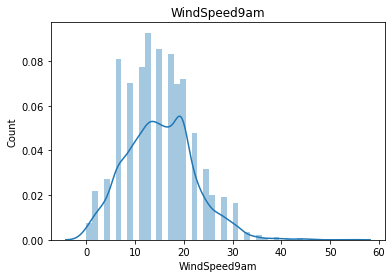

<Figure size 1080x1080 with 0 Axes>

C:\Users\sarth\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


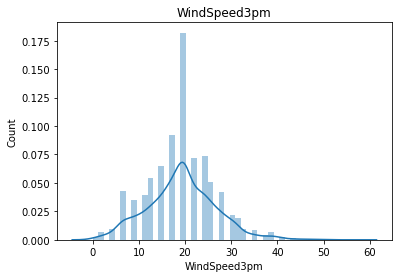

<Figure size 1080x1080 with 0 Axes>

C:\Users\sarth\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


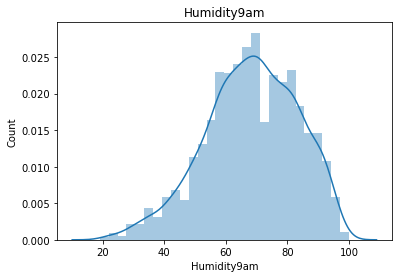

<Figure size 1080x1080 with 0 Axes>

C:\Users\sarth\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


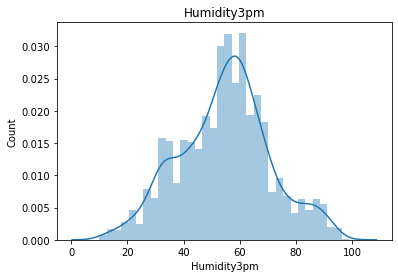

<Figure size 1080x1080 with 0 Axes>

C:\Users\sarth\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


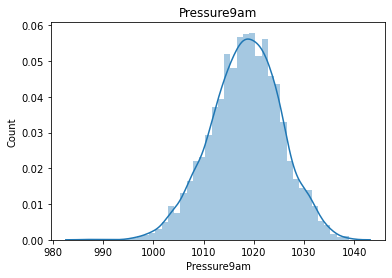

<Figure size 1080x1080 with 0 Axes>

C:\Users\sarth\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


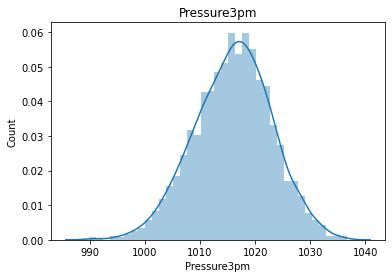

<Figure size 1080x1080 with 0 Axes>

C:\Users\sarth\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


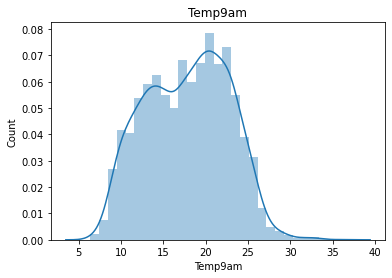

<Figure size 1080x1080 with 0 Axes>

C:\Users\sarth\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


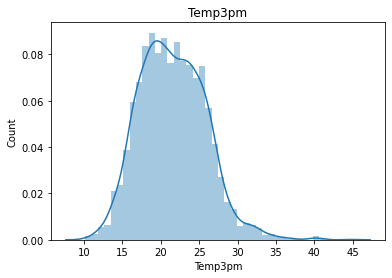

<Figure size 1080x1080 with 0 Axes>

In [12]:
for feature in continuous_features:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

### Probability Plot Of continuous_features 

MinTemp


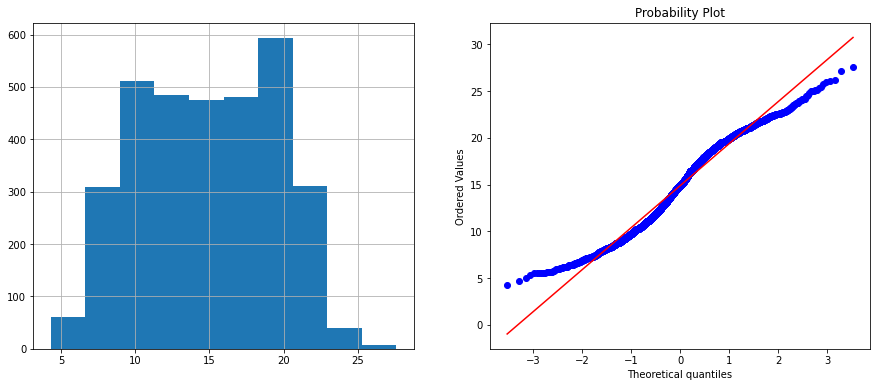

MaxTemp


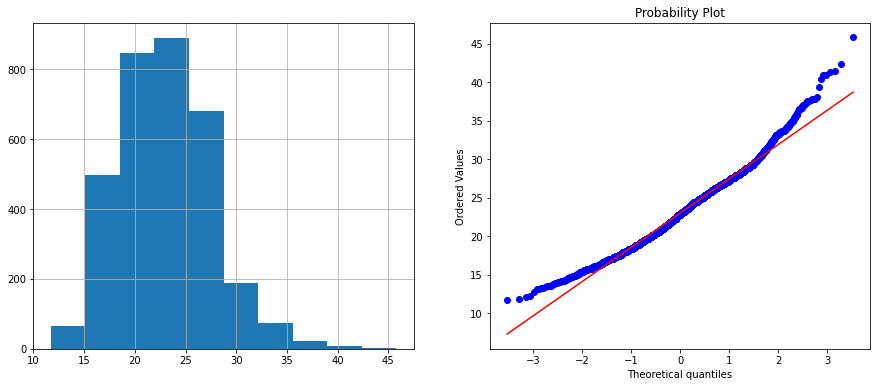

Rainfall


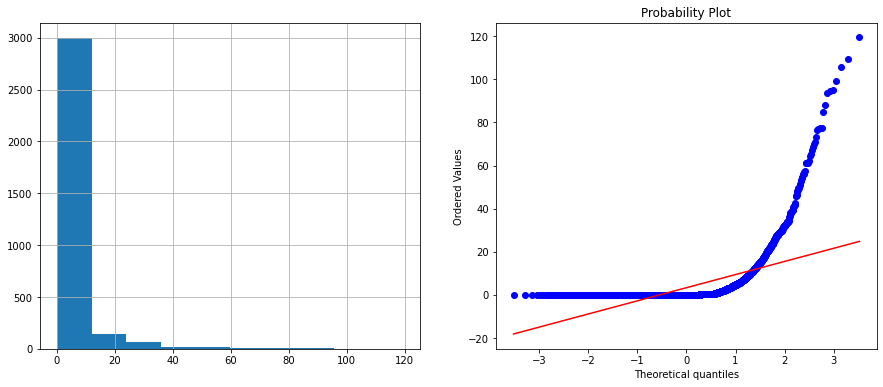

Evaporation


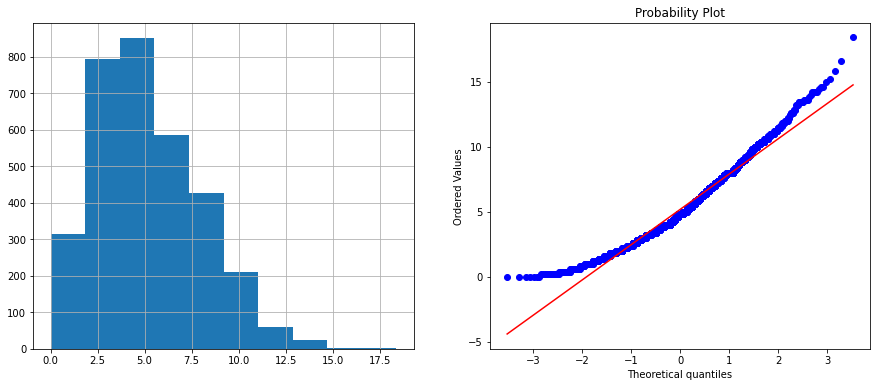

Sunshine


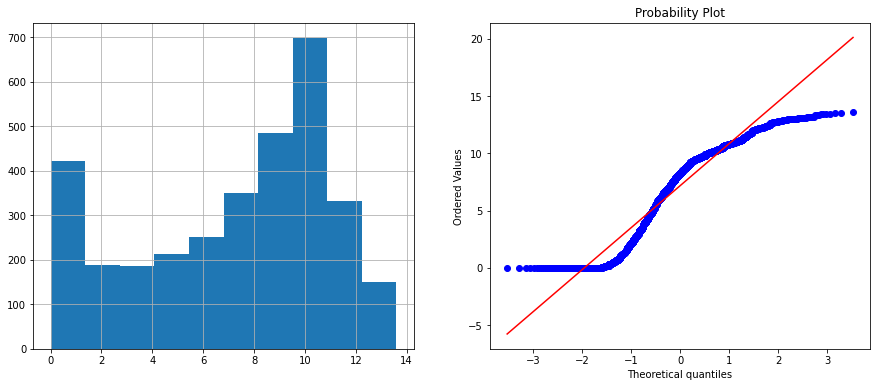

WindGustSpeed


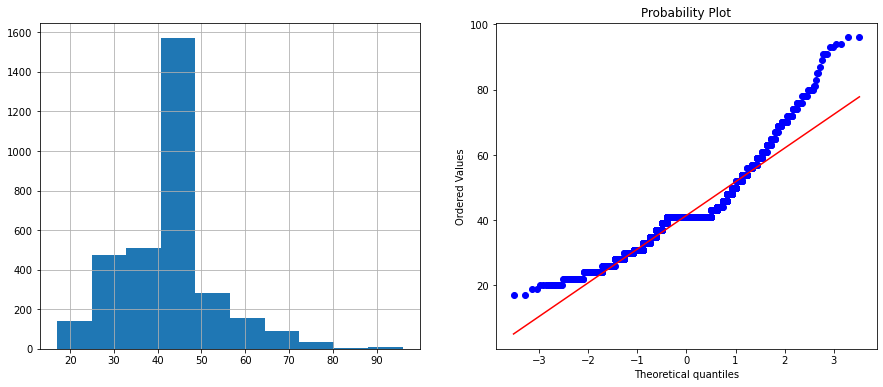

WindSpeed9am


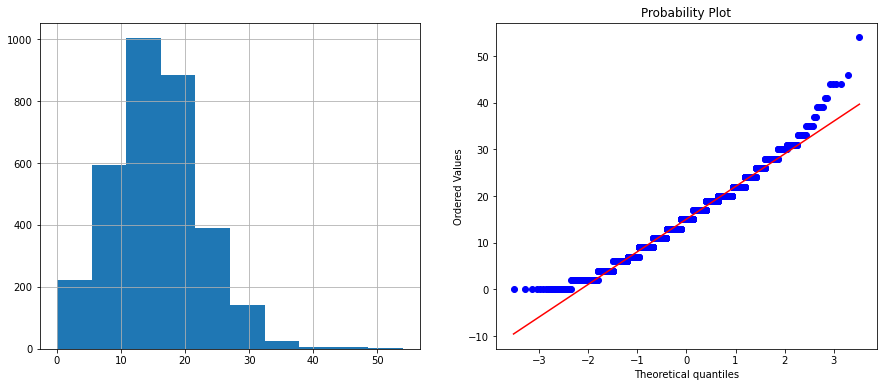

WindSpeed3pm


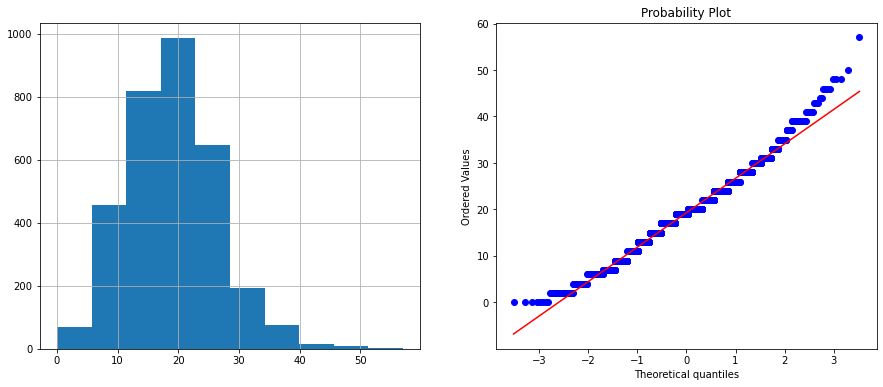

Humidity9am


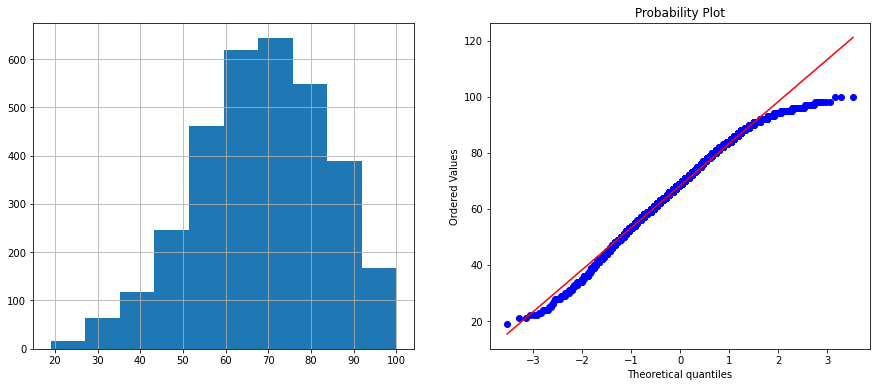

Humidity3pm


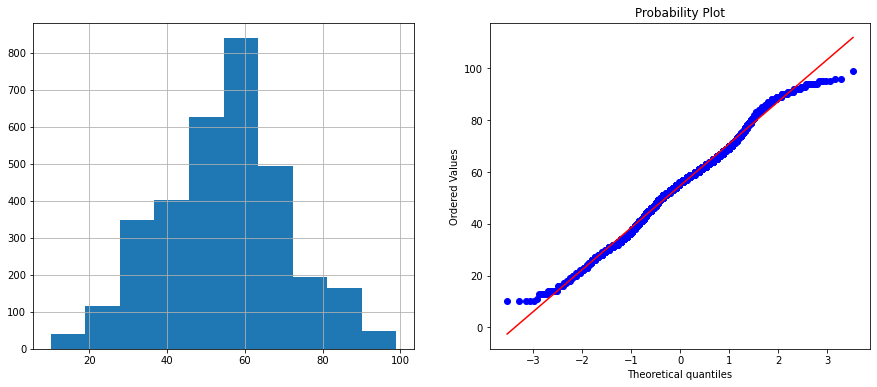

Pressure9am


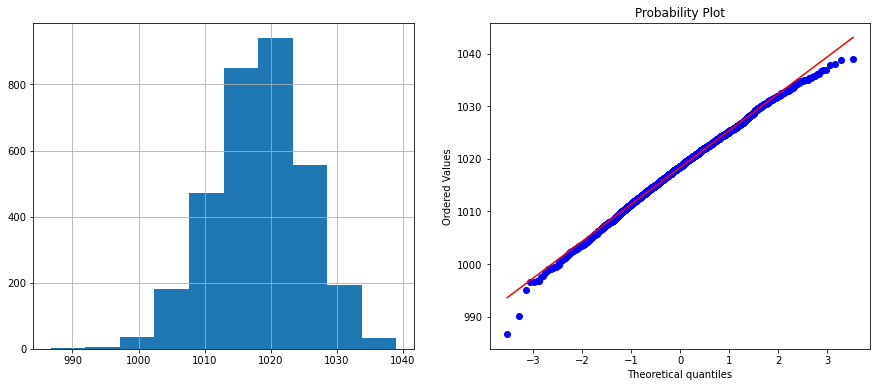

Pressure3pm


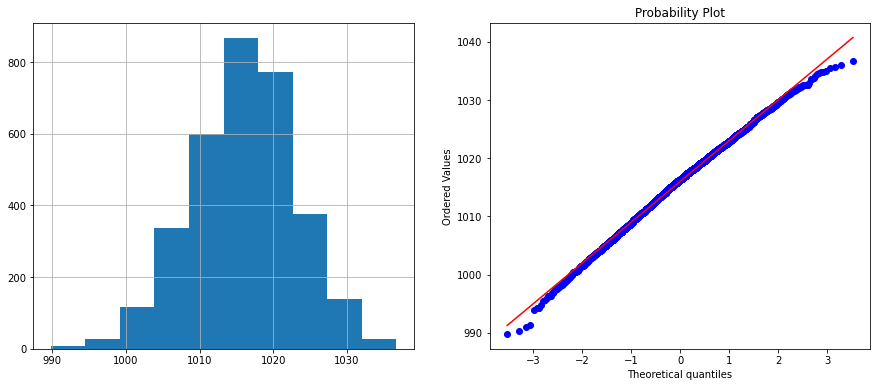

Temp9am


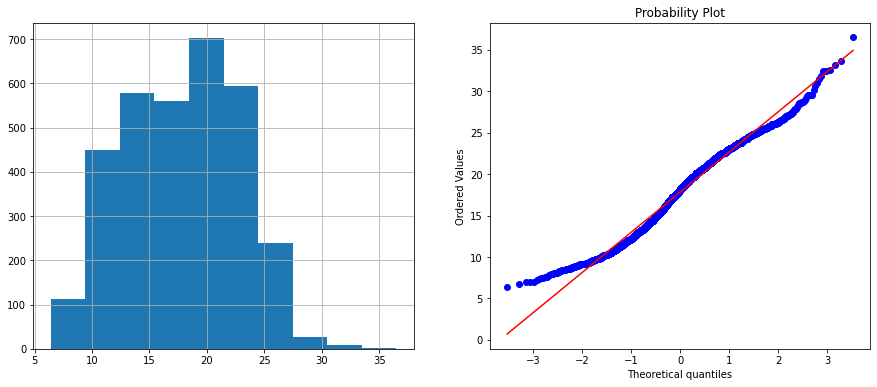

Temp3pm


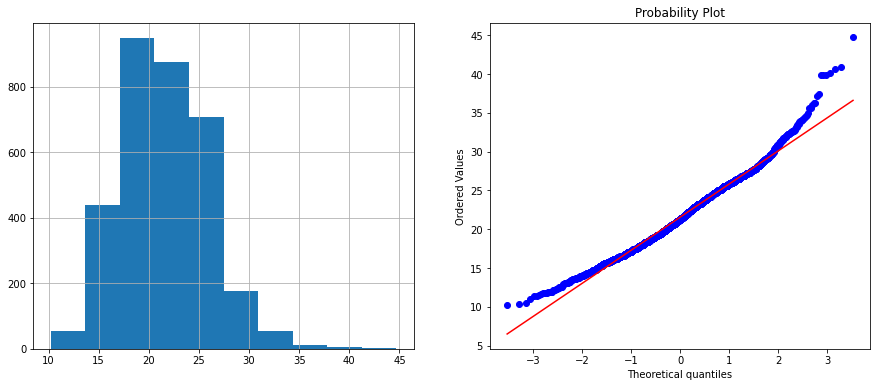

In [13]:
import scipy.stats as stats
for feature in continuous_features:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [15]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,6.2,0.0,13,41,8,11,17,...,92,84,1017.6,1017.4,8,8,20.7,20.9,1,1
1,19.5,25.6,6.0,3.4,2.7,13,41,13,0,9,...,83,73,1017.9,1016.4,7,7,22.4,24.8,1,1
2,21.6,24.5,6.6,2.4,0.1,13,41,2,2,17,...,88,86,1016.7,1015.6,7,8,23.5,23.0,1,1
3,20.2,22.8,18.8,2.2,0.0,13,41,5,0,22,...,83,90,1014.2,1011.8,8,8,21.4,20.9,1,1
4,19.7,25.7,77.4,4.8,0.0,13,41,5,13,11,...,88,74,1008.3,1004.8,8,8,22.5,25.5,1,1


<AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>

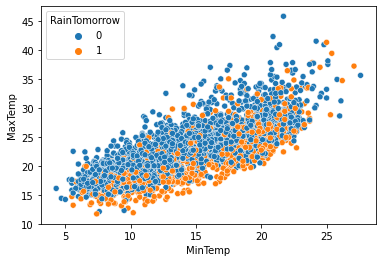

In [16]:
import seaborn as sns
sns.scatterplot(x = df['MinTemp'], y = df['MaxTemp'] ,hue = df['RainTomorrow'])

<AxesSubplot:xlabel='Humidity3pm', ylabel='Temp3pm'>

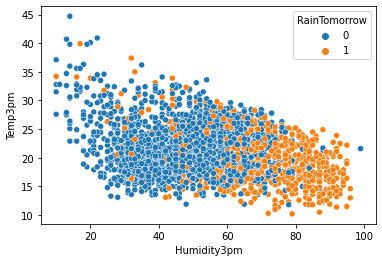

In [17]:
sns.scatterplot(x = df['Humidity3pm'], y = df['Temp3pm'] ,hue = df['RainTomorrow'])

<AxesSubplot:xlabel='Humidity9am', ylabel='Temp9am'>

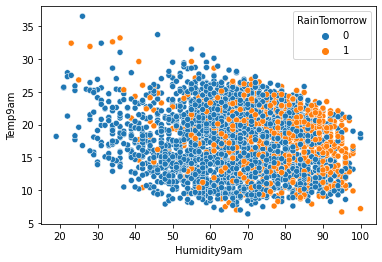

In [18]:
sns.scatterplot(x = df['Humidity9am'], y = df['Temp9am'] ,hue = df['RainTomorrow'])

<AxesSubplot:xlabel='Cloud9am', ylabel='Humidity9am'>

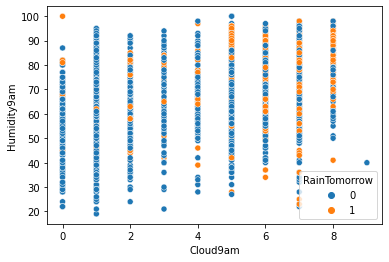

In [19]:
sns.scatterplot(x = df['Cloud9am'], y = df['Humidity9am'] ,hue = df['RainTomorrow'])

<AxesSubplot:xlabel='Cloud3pm', ylabel='Humidity3pm'>

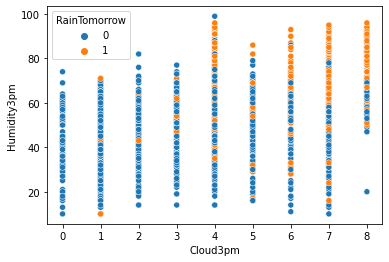

In [20]:
sns.scatterplot(x = df['Cloud3pm'], y = df['Humidity3pm'] ,hue = df['RainTomorrow'])

In [21]:
#sns.pairplot(df)

<AxesSubplot:>

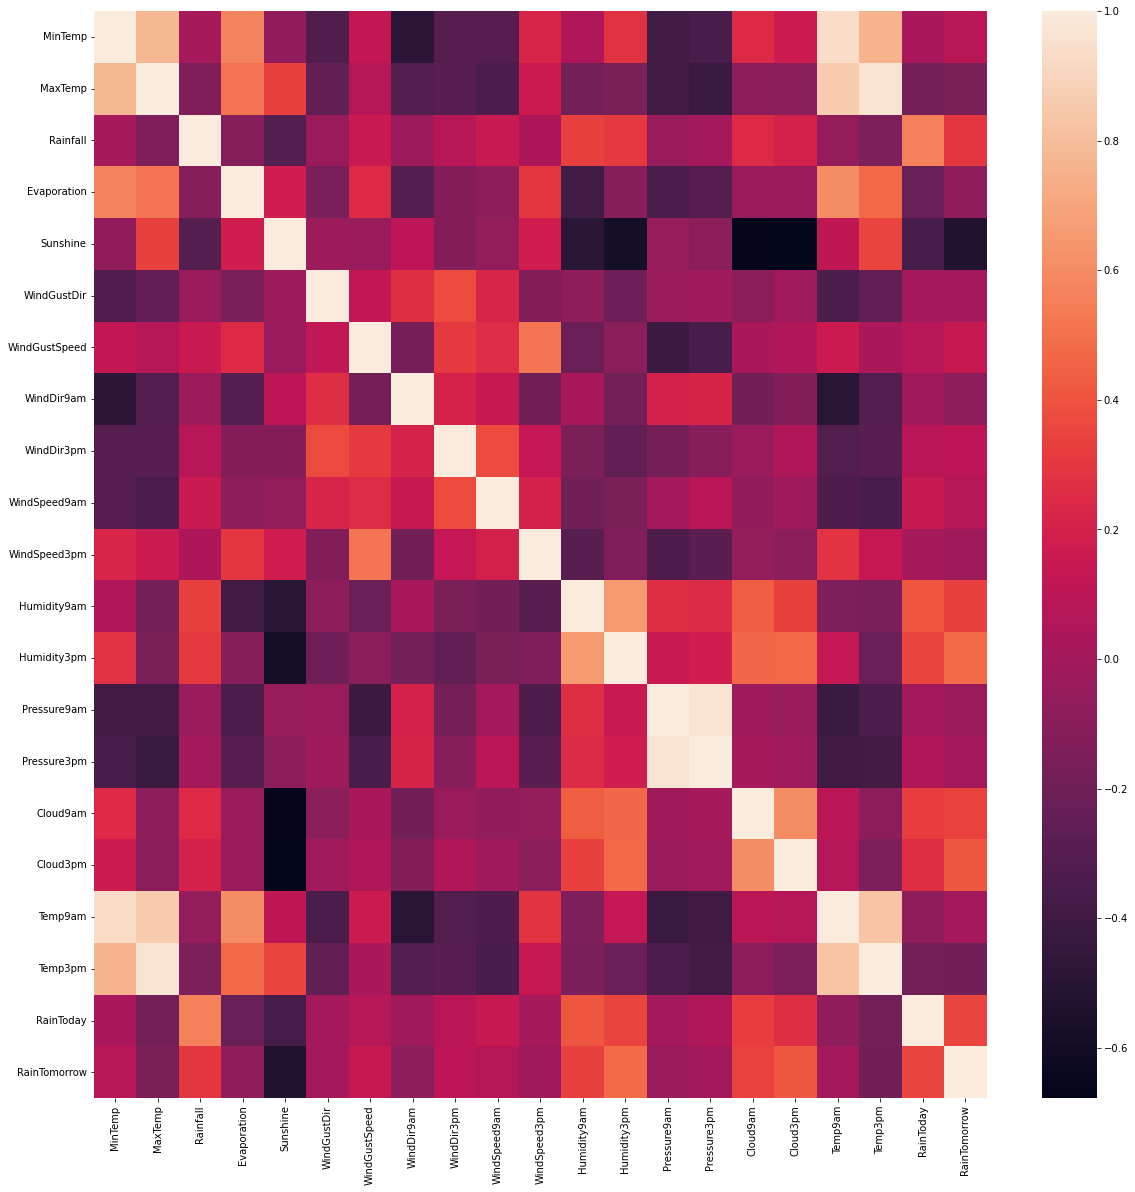

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

### Assigning Dependent and Independent Features
* X = Independent
* Y = Dependent

In [23]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

### Train-Test Split

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [26]:
accuracy = []

# Model Building
# 1) KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
k_val = range(30)
scores=[]
for k in k_val:
    k = k+1
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    knn_pred = knn.predict(X_test)
    #print(confusion_matrix(Y_test, knn_pred))
    #print("classification Report :",classification_report(Y_test, knn_pred))
    #print("accuracy Score :",accuracy_score(Y_test, knn_pred))
    scores.append(accuracy_score(Y_test, knn_pred))


C:\Users\sarth\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7129856045715001

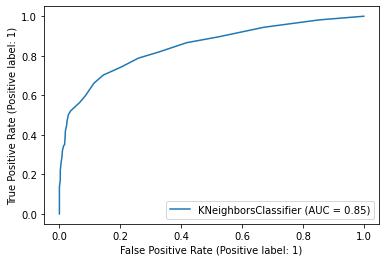

In [28]:
from sklearn import metrics
metrics.plot_roc_curve(knn, X_test, Y_test)
metrics.roc_auc_score(Y_test, knn_pred, average=None) 

### Accuracy of model With diffrent values of K in KNN

In [29]:
max_knn=max(scores)
accuracy.append(round((max_knn),2))
max_knn

0.8391038696537678

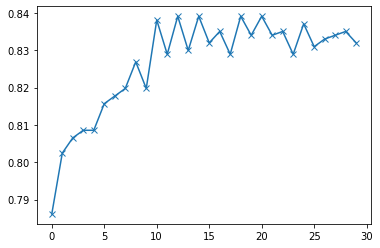

In [30]:
plt.plot(k_val,scores,marker = 'x')
plt.show()

# 2)Decision tree


In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
dtc_pred = dtc.predict(X_test)
print(confusion_matrix(Y_test, dtc_pred))
print("classification Report :",classification_report(Y_test, dtc_pred))
print("accuracy Score :",accuracy_score(Y_test, dtc_pred))
accuracy.append(round((accuracy_score(Y_test, dtc_pred)),2))

[[590 123]
 [128 141]]
classification Report :               precision    recall  f1-score   support

           0       0.82      0.83      0.82       713
           1       0.53      0.52      0.53       269

    accuracy                           0.74       982
   macro avg       0.68      0.68      0.68       982
weighted avg       0.74      0.74      0.74       982

accuracy Score : 0.7443991853360489


### Accuracy of model  Decision Tree Classifier

C:\Users\sarth\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.6758265249195764

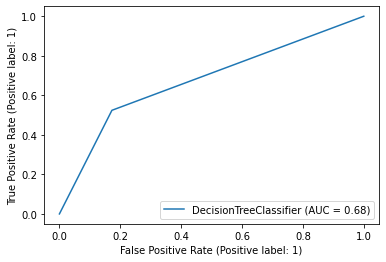

In [32]:
from sklearn import metrics
metrics.plot_roc_curve(dtc, X_test, Y_test)
metrics.roc_auc_score(Y_test, dtc_pred, average=None) 

# 3)Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
lr_pred = lr.predict(X_test)
print(confusion_matrix(Y_test, lr_pred))
print("classification Report :\n",classification_report(Y_test, lr_pred))
print("accuracy Score :",accuracy_score(Y_test, lr_pred))
accuracy.append(round((accuracy_score(Y_test, lr_pred)),2))

[[658  55]
 [104 165]]
classification Report :
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       713
           1       0.75      0.61      0.67       269

    accuracy                           0.84       982
   macro avg       0.81      0.77      0.78       982
weighted avg       0.83      0.84      0.83       982

accuracy Score : 0.8380855397148677


C:\Users\sarth\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Accuracy of model Logistic Regression

C:\Users\sarth\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7681220248491896

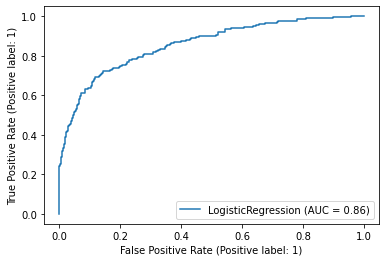

In [34]:
from sklearn import metrics
metrics.plot_roc_curve(lr, X_test, Y_test)
metrics.roc_auc_score(Y_test, lr_pred, average=None) 

# 4)SVM

In [35]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,Y_train)
svm_pred= lr.predict(X_test)
print(confusion_matrix(Y_test, svm_pred))
print("classification Report :\n",classification_report(Y_test, svm_pred))
print("accuracy Score :",accuracy_score(Y_test, svm_pred))
accuracy.append(round((accuracy_score(Y_test, svm_pred)),2))

[[658  55]
 [104 165]]
classification Report :
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       713
           1       0.75      0.61      0.67       269

    accuracy                           0.84       982
   macro avg       0.81      0.77      0.78       982
weighted avg       0.83      0.84      0.83       982

accuracy Score : 0.8380855397148677


### Accuracy of model Support Vector Machine

C:\Users\sarth\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7681220248491896

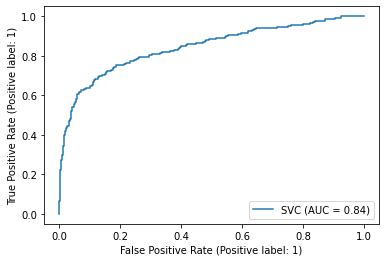

In [36]:
from sklearn import metrics
metrics.plot_roc_curve(svm, X_test, Y_test)
metrics.roc_auc_score(Y_test, svm_pred, average=None) 

# 5)Multiple Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
mlr= LinearRegression()
mlr.fit(X_train,Y_train)
mlr_pred= lr.predict(X_test)
print(confusion_matrix(Y_test, mlr_pred))
print("classification Report :\n",classification_report(Y_test, mlr_pred))
print("accuracy Score :",accuracy_score(Y_test, mlr_pred))
accuracy.append(round((accuracy_score(Y_test, mlr_pred)),2))

[[658  55]
 [104 165]]
classification Report :
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       713
           1       0.75      0.61      0.67       269

    accuracy                           0.84       982
   macro avg       0.81      0.77      0.78       982
weighted avg       0.83      0.84      0.83       982

accuracy Score : 0.8380855397148677


In [38]:
models = ['KNN','DTC','LR','SVM','MLR']

# Model Evaluation

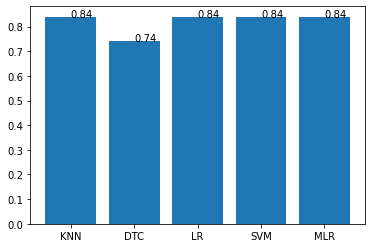

In [39]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
ax = plt.bar(models,accuracy)
addlabels(models, accuracy)

In [40]:
accuracy_df = pd.DataFrame(accuracy,models)

In [41]:
accuracy_df

,0
KNN,0.84
DTC,0.74
LR,0.84
SVM,0.84
MLR,0.84
